In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("full_dataset.csv", index_col=0)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP


In [25]:
def converting_to_datetime (df):
    """
    Converting the dates in the dataset into pandas datetime data type
    """
    df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
    df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
    df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
    df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
    df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
    df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

    return df

In [26]:
def Extracting_Date_Features (df):
    """
    Extracting features from existing features and converting them to float
    (for example, a 1 days 12:00:00 it will be converted to 1.5)
    1) order approval time >>> the amount of time it took the company approve the order
    2) approval carrier time >>> time taken from the order approval to carrier delivery
    3) delivery from carrier >>> time taken from the carrier to the customer delivery
    4) order to carrier delivery >>> time from order placement to carrier delivery
    5) order to customer delivery >>> time from order placement to customer delivery
    6) order to estimated delivery >>> time from order placement to the estimated time given to the customer
    """
    
    df['order_approval_time'] =  (df['order_approved_at'] - df['order_purchase_timestamp']) / pd.Timedelta(days=1)
    df['approval_carrier_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']) / pd.Timedelta(days=1)
    df['delivery_from_carrier'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']) / pd.Timedelta(days=1)
    
    df['order_to_carrier_delivery'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']) / pd.Timedelta(days=1)
    df['order_to_cutomer_delivery'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']) / pd.Timedelta(days=1)
    df['order_to_estimated_delivery'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']) / pd.Timedelta(days=1)
    return df

In [27]:
def getting_target_value (df):
    '''
    1) 1 : the delivery is late
    2) 0 : the delivery is on time
    '''
    df['Late_delivery'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

    return df

In [28]:
def drop_cols(df):
    unuseful_columns = ['order_id', 'customer_id', 'customer_unique_id', 'order_item_id','product_id','seller_id',
    'review_id',
    'review_score',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp',
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'customer_zip_code_prefix',
    'customer_city',
    'seller_zip_code_prefix']
    
    date_columns = ['order_purchase_timestamp','order_approved_at',
                    'order_delivered_carrier_date','order_delivered_customer_date',
                   'order_estimated_delivery_date','shipping_limit_date'] # after applying feature extractions
    unuseful_columns.extend(date_columns)
    df.drop(columns = unuseful_columns, inplace= True)
    return df

In [29]:
df = converting_to_datetime(df)
df = Extracting_Date_Features(df)
df = getting_target_value(df)
df = drop_cols(df)

In [30]:
df.head()

,order_status,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,seller_city,seller_state,order_approval_time,approval_carrier_time,delivery_from_carrier,order_to_carrier_delivery,order_to_cutomer_delivery,order_to_estimated_delivery,Late_delivery
0,delivered,SP,29.99,8.72,1,credit_card,1,18.12,housewares,maua,SP,0.007431,2.366493,6.062650,2.373924,8.436574,15.544063,False
1,delivered,SP,29.99,8.72,3,voucher,1,2.00,housewares,maua,SP,0.007431,2.366493,6.062650,2.373924,8.436574,15.544063,False
2,delivered,SP,29.99,8.72,2,voucher,1,18.59,housewares,maua,SP,0.007431,2.366493,6.062650,2.373924,8.436574,15.544063,False
3,delivered,BA,118.70,22.76,1,boleto,1,141.46,perfumery,belo horizonte,SP,1.279745,0.462882,12.039410,1.742627,13.782037,19.137766,False
4,delivered,GO,159.90,19.22,1,credit_card,3,179.12,auto,guariba,SP,0.011505,0.204595,9.178113,0.216100,9.394213,26.639711,False


## Exploratory Data Analysis

In [31]:
df.shape

(115609, 18)

In [32]:
df.columns

Index(['order_status', 'customer_state', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name_english', 'seller_city',
       'seller_state', 'order_approval_time', 'approval_carrier_time',
       'delivery_from_carrier', 'order_to_carrier_delivery',
       'order_to_cutomer_delivery', 'order_to_estimated_delivery',
       'Late_delivery'],
      dtype='object')

In [33]:
df.dtypes

order_status                      object
customer_state                    object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
product_category_name_english     object
seller_city                       object
seller_state                      object
order_approval_time              float64
approval_carrier_time            float64
delivery_from_carrier            float64
order_to_carrier_delivery        float64
order_to_cutomer_delivery        float64
order_to_estimated_delivery      float64
Late_delivery                       bool
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115609 entries, 0 to 115608
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   115609 non-null  object 
 1   customer_state                 115609 non-null  object 
 2   price                          115609 non-null  float64
 3   freight_value                  115609 non-null  float64
 4   payment_sequential             115609 non-null  int64  
 5   payment_type                   115609 non-null  object 
 6   payment_installments           115609 non-null  int64  
 7   payment_value                  115609 non-null  float64
 8   product_category_name_english  115609 non-null  object 
 9   seller_city                    115609 non-null  object 
 10  seller_state                   115609 non-null  object 
 11  order_approval_time            115595 non-null  float64
 12  approval_carrier_time          1144

In [35]:
df.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,order_approval_time,approval_carrier_time,delivery_from_carrier,order_to_carrier_delivery,order_to_cutomer_delivery,order_to_estimated_delivery
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115595.000000,114400.000000,113208.000000,114414.000000,113209.000000,115609.000000
mean,120.619850,20.056880,1.093747,2.946233,172.387379,0.437634,2.843217,9.168334,3.279226,12.442148,23.866239
std,182.653476,15.836184,0.729849,2.781087,265.873969,0.927670,3.545346,8.553770,3.618769,9.356008,8.888722
min,0.850000,0.000000,1.000000,0.000000,0.000000,0.000000,-171.219005,-16.096169,-171.212419,0.533414,2.008009
25%,39.900000,13.080000,1.000000,1.000000,60.870000,0.008993,0.884664,4.062905,1.137159,6.739016,18.408333
50%,74.900000,16.320000,1.000000,2.000000,108.050000,0.014479,1.842940,7.059144,2.229635,10.188437,23.262627
75%,134.900000,21.210000,1.000000,4.000000,189.480000,0.624201,3.637031,11.909980,4.115793,15.503484,28.482014
max,6735.000000,409.680000,29.000000,24.000000,13664.080000,60.452766,107.053218,205.190972,107.064606,208.351759,155.135463


### Handling the null and duplicated values

In [36]:
df.isnull().sum()

order_status                        0
customer_state                      0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name_english       0
seller_city                         0
seller_state                        0
order_approval_time                14
approval_carrier_time            1209
delivery_from_carrier            2401
order_to_carrier_delivery        1195
order_to_cutomer_delivery        2400
order_to_estimated_delivery         0
Late_delivery                       0
dtype: int64

In [37]:
df.dropna(inplace = True)

In [38]:
df.duplicated().sum()

11555

In [39]:
df.drop_duplicates(inplace= True)

In [56]:
df['Late_delivery'].value_counts()

Late_delivery
False    93705
True      7935
Name: count, dtype: int64

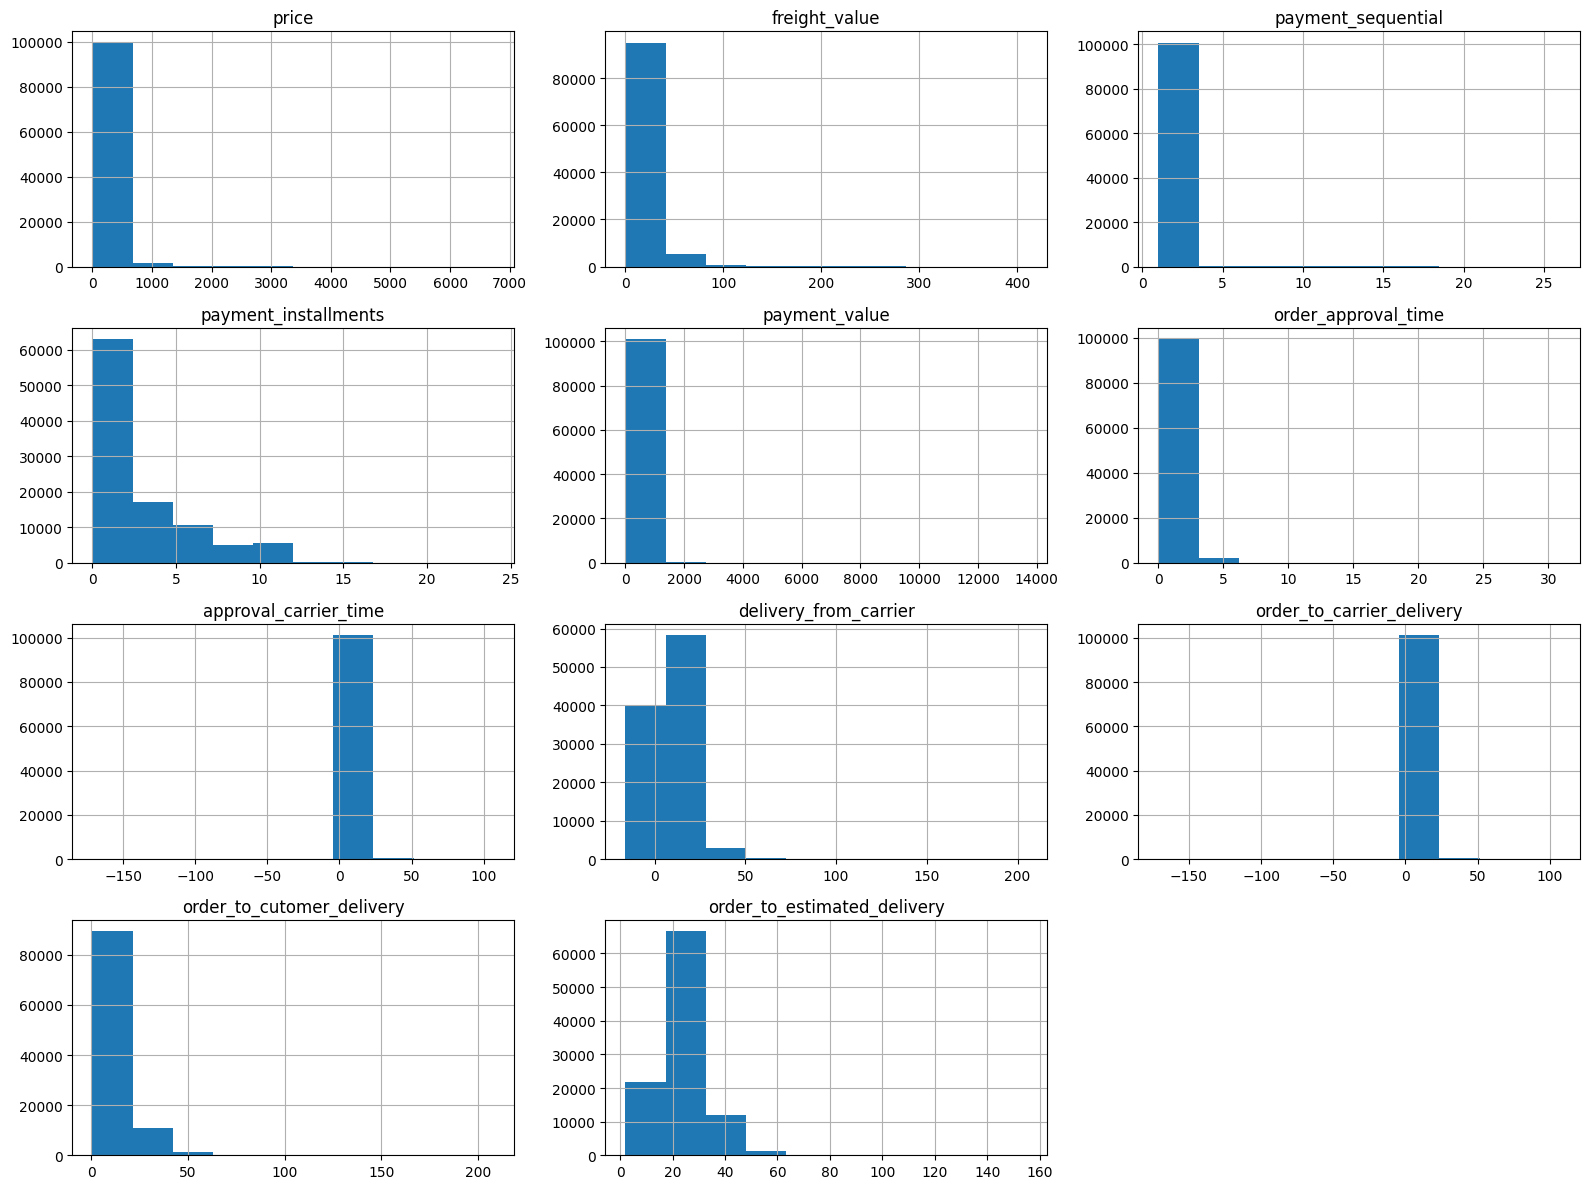

In [48]:
df.hist(figsize=(16,12),)
plt.xticks(rotation=45)
plt.title("Numerical attributes Histogram")
plt.tight_layout()

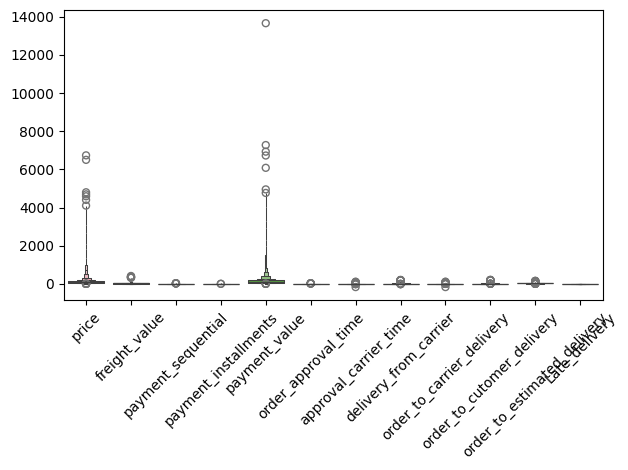

In [43]:
sns.boxenplot(df)
plt.xticks(rotation= 45)
plt.tight_layout()

In [44]:
# we have only one outlier which is in the payment_value
df['payment_value'].sort_values(ascending= False)

15472     13664.08
77337      7274.88
25783      6929.31
4049       6726.66
37701      6081.54
            ...   
110763        0.01
99640         0.00
37659         0.00
112728        0.00
491           0.00
Name: payment_value, Length: 101639, dtype: float64

In [45]:
df.loc[13697, 'payment_value'] = 7274.88

In [46]:
df.iloc[13697]

order_status                           delivered
customer_state                                RJ
price                                     1680.0
freight_value                              28.01
payment_sequential                             1
payment_type                         credit_card
payment_installments                           1
payment_value                           13664.08
product_category_name_english    fixed_telephony
seller_city                            sao paulo
seller_state                                  SP
order_approval_time                     3.002407
approval_carrier_time                   8.010382
delivery_from_carrier                   7.110556
order_to_carrier_delivery              11.012789
order_to_cutomer_delivery              18.123345
order_to_estimated_delivery            23.357731
Late_delivery                              False
Name: 15472, dtype: object

In [70]:
df['order_status'].value_counts()

order_status
delivered    101633
canceled          7
Name: count, dtype: int64